In [224]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal, norm, uniform
import scipy.integrate as integrate
from ipywidgets import interact, interactive
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import pickle
import time

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [291]:
with open("datasets/明实录.txt", "r") as f:
    mingshilu = f.read()

In [338]:
pattern = r"\S+国\S{0,6}遣"
matched = re.findall(pattern, mingshilu)
#matched

In [427]:
country_extract = r"\S{2}国"
matched_country = []
for i in matched:
    matched_country.append(re.findall(country_extract, i))
matched_country = [x for x in matched_country for x in x]
#matched_country

matched_country_df = pd.DataFrame(data = {'country': matched_country})
sorted_country = pd.DataFrame({'country':matched_country_df.groupby('country', as_index = False).size().sort_values(ascending = False)})
valid_countries = [list(sorted_country.index)[i] for i in (0,1,2,3,4,5,6,7,8,9,10,11,13,14,16)]
valid_countries

['朝鲜国',
 '琉球国',
 '占城国',
 '安南国',
 '爪哇国',
 '日本国',
 '暹罗国',
 '高丽国',
 '剌加国',
 '罗斛国',
 '灌顶国',
 '真腊国',
 '答剌国',
 '葛剌国',
 '浡泥国']

#### 

In [332]:
#question: does each chapter represents each month?
#Pattern: 卷之chinese number space+ reign era + year + month + 

month_extract = r"卷[之]?[一二三四五六七八九十百]+[）]?[上下]?\s+\S+[正一二三四五六七八九十]{1,2}月"
matched_month = re.findall(month_extract, mingshilu)

#cleared year and month

month_by_emperor = []
for i in matched_month:
    x = re.findall(r"((洪武|建文|永乐|洪熙|宣德|正统|景泰|天顺|成化|弘治|正德|嘉靖|隆庆|万历|泰昌|天启)(\S{0,4}年\S{0,4}月))", i)
    if x != []:
        month_by_emperor.append(x[0][0])
#month_by_emperor

In [361]:
month_extract = r'((洪武|建文|永乐|洪熙|宣德|正统|景泰|天顺|成化|弘治|正德|嘉靖|隆庆|万历|泰昌|天启)(\S{0,4}年)(\S{0,4}月))|(\S{0,5}国\S{0,6}遣)'
matched_month = re.findall(month_extract, mingshilu)
matched_month[0:10]

[('永乐十六年五月', '永乐', '十六年', '五月', ''),
 ('永乐十六年五月', '永乐', '十六年', '五月', ''),
 ('永乐元年六月', '永乐', '元年', '六月', ''),
 ('永乐元年六月', '永乐', '元年', '六月', ''),
 ('永乐元年六月', '永乐', '元年', '六月', ''),
 ('永乐元年六月', '永乐', '元年', '六月', ''),
 ('永乐元年六月', '永乐', '元年', '六月', ''),
 ('永乐元年六月', '永乐', '元年', '六月', ''),
 ('', '', '', '', '○乙卯方国珍遣'),
 ('', '', '', '', '俾见天日此国珍所素愿也谨遣')]

In [489]:
## Match tributes with month/year 

## use an iterator to record the last month and the last tribute 

final = []
date = ['洪武元年春正月', '洪武', '元年', '春正月']
for i in matched_month:
    if i[0] != '' and re.findall(r'[正一二三四五六七八九十]{1,2}月', i[3]) != []:
        date = [i[0], i[1], i[2], i[3]]
    elif i[4] != '':
        _country = re.findall(r'朝鲜国|琉球国|占城国|安南国|爪哇国|日本国|暹罗国|高丽国|剌加国|罗斛国|灌顶国|真腊国|答剌国|葛剌国|浡泥国', i[4])
        if _country != []:
            final.append([_country[0], date])

In [491]:
## deliverable
### a table with country, coming/going, year, month

country_col = []
emperor_col = []
year_col = []
month_col = []
for i in final:
    country_col.append(i[0])
    emperor_col.append(i[1][1])
    year_col.append(i[1][2])
    month_col.append(re.findall(r'[正一二三四五六七八九十]{1,2}月',i[1][3])[0])

final_df = pd.DataFrame(data = {'Country': country_col, 'Emperor': emperor_col, 'Year': year_col, 'Month': month_col})

In [493]:
def helper(emperor):
    if emperor == '洪武':
        return 1
    if emperor == '建文':
        return 2
    if emperor == '永乐':
        return 3
    if emperor == '洪熙':
        return 4
    if emperor == '宣德':
        return 5
    if emperor == '正统':
        return 6
    if emperor == '景泰':
        return 7
    if emperor == '天顺':
        return 8
    if emperor == '成化':
        return 9
    if emperor == '弘治':
        return 10
    if emperor == '正德':
        return 11
    if emperor == '嘉靖':
        return 12
    if emperor == '隆庆':
        return 13
    if emperor == '万历':
        return 14
    if emperor == '泰昌':
        return 15
    if emperor == '天启':
        return 16

final_df['Emperor Order'] = [helper(x) for x in final_df['Emperor']]
final_df

final_df.to_csv('final.csv')

Text(0.5, 1.0, '朝鲜分朝代朝贡图')

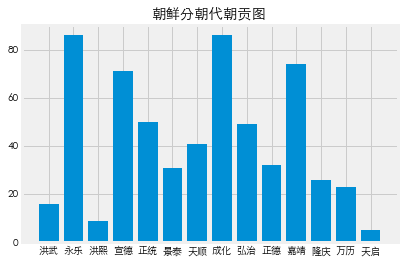

In [467]:
by_country_emperor = final_df.groupby(['Country', 'Emperor', 'Emperor Order']).size().to_frame('count').reset_index()
chaoxian = by_country_emperor[by_country_emperor['Country'] == '朝鲜国'].sort_values('Emperor Order')

plt.rcParams['font.family'] = ['Heiti TC']

plt.bar(chaoxian['Emperor'], chaoxian['count'])
plt.title('朝鲜分朝代朝贡图')

In [122]:
#figuring it out: is it the country coming to Ming, or the other way around


In [123]:
##Bonus
#On the lookout for typos
#finding dates by matching 天干地支 with number 

In [284]:
## Check how many times a country show up without the word 国
## Check with those tributes with mentions over 4

country_without = r"琉球[^遣○]{16,45}遣"
matched = re.findall(country_without, mingshilu)
#len(matched)

## Writing Sample
### (1) literature review of scholars (what they have missed, both in theory and data)
#### 1.1 some are some countries or some time，mine is comprehensive
#### 1.2 this is a portion of the thesis that would compare the Song with Ming
#### 1.3 methodology with data, regex (distant reading)
### (2) Annual and temporal patterns (year (with in a dynasty) and month (time within a year))
#### 2.1 Tables
#### 2.2 Maps of different size points based on number of tributes